In [1]:
##### setting
### set filename you want to analysis
pkldata = None

if pkldata == None:
    import os
    import smooziee
    pkldata = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GL711_p0p55_RT_1.pkl')

In [2]:
##### import
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
import matplotlib.pyplot as plt
imp.reload(fitting)
imp.reload(peak_search)

<module 'smooziee.smooziee.peak_search' from '/home/mizokami-ubuntu/Github/smooziee/smooziee/peak_search.py'>

the number of peaks: 9


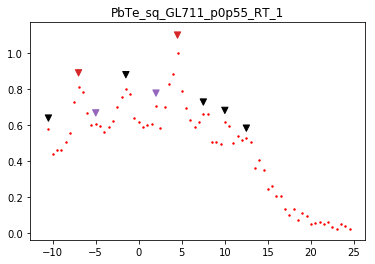

In [3]:
### show peaksearch result
peak_num = fitting.result_peaksearch(pkldata, return_peak_num=True)

In [4]:
### make Fitting class object
fitter = fitting.Fitting(pkldata, ['lorentzian' for i in range(peak_num)])

In [5]:
### set parameters to optimize
# param_names => 'amplitude', 'sigma', 'center'
fitter.set_params_vary(i_peaks=list(range(peak_num)), param_names=['center'], vary=False)

In [6]:
fitter.peaksearch.ix_peakpairs

[[7, 30], [11, 25]]

In [7]:
### parameters
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1    1e-08      inf     None     True     None     None
l0_center        -10.5     -inf      inf     None    False     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf     None     True     None     None
l1_amplitude         1    1e-08      inf     None     True     None     None
l1_center           -7     -inf      inf     None    False     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1    1e-08      inf     None     True     None     None
l2_amplitude         1    1e-08      inf     None     True 

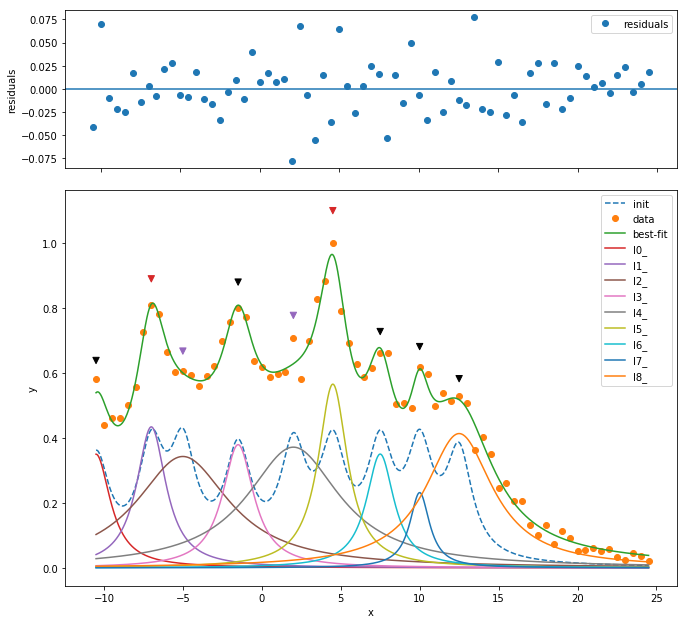

In [8]:
### fit and check
fitter.fit()
fitter.plot(show_init=True, numpoints=1000, eval_components=True)

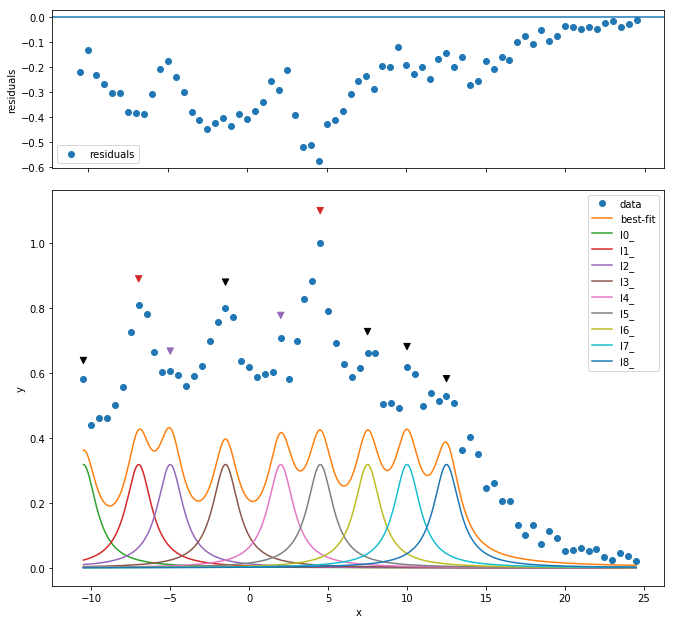

In [9]:
### plot using current param (before fitting)
fitter.plot_from_params(numpoints=1000, eval_components=True)

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     1.214    1e-08      inf   0.4031     True     None     None
l0_center        -10.5     -inf      inf        0    False     None     None
l0_fwhm          2.208     -inf      inf   0.5535    False 2.0000000*l0_sigma     None
l0_height       0.3501     -inf      inf  0.04921    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma         1.104    1e-08      inf   0.2767     True     None     None
l1_amplitude     1.544    1e-08      inf   0.3118     True     None     None
l1_center           -7     -inf      inf        0    False     None     None
l1_fwhm          2.264     -inf      inf   0.2515    False 2.0000000*l1_sigma     None
l1_height       0.4343     -inf      inf  0.05341    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         1.132    1e-08      inf   0.1257     True     None     None
l2_amplitude      3.88    1e-08      inf    1.274     True 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (71,)

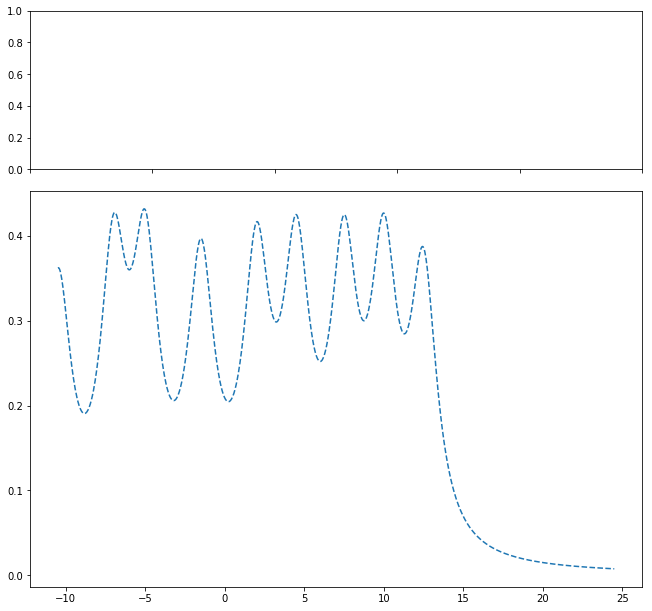

In [53]:
### compare current params and fitted params
### if fitted params are better, overwrite current params
fitter.set_result_param_to_inital()
fitter.params.pretty_print()
fitter.plot(show_init=True, numpoints=1000, eval_components=True)

In [ ]:
### set params by hand
## param_name = 'amplitude' or 'sigma' or 'center'
fitter.set_params(i_peak=2, param_name='sigma', values={'value': 0.4})
fitter.set_params(i_peak=2, param_name='amplitude', values={'value': 0.1})
fitter.set_params(i_peak=4, param_name='amplitude', values={'value': 0.2})
fitter.plot_from_params(show_init=True, eval_components=True)

In [ ]:
fitter.set_params_vary([2, 4], ['sigma', 'amplitude'], vary=False)
fitter.fit()
fitter.set_result_param_to_inital()
fitter.plot(show_init=True, eval_components=True)

In [ ]:
fitter.fit()
fitter.set_result_param_to_inital()
fitter.plot(show_init=True, eval_components=True)

In [ ]:
fitter.set_params_vary(i_peaks=range(peak_num),
                       param_names=['sigma', 'amplitude', 'center'],
                       vary=True)
fitter.fit()
fitter.set_result_param_to_inital()
fitter.params.pretty_print()

In [ ]:
fitter.plot(show_init=True, eval_components=True)
# type(fitter.result)

In [22]:
fitter.params['l0_amplitude'].value

1.2142682813579597

In [24]:
fitter.peaksearch.name[-1]

'1'

In [59]:
param_names = list(fitter.params.keys())

In [60]:
param_names

['l0_sigma',
 'l0_center',
 'l0_amplitude',
 'l1_sigma',
 'l1_center',
 'l1_amplitude',
 'l2_sigma',
 'l2_center',
 'l2_amplitude',
 'l3_sigma',
 'l3_center',
 'l3_amplitude',
 'l4_sigma',
 'l4_center',
 'l4_amplitude',
 'l5_sigma',
 'l5_center',
 'l5_amplitude',
 'l6_sigma',
 'l6_center',
 'l6_amplitude',
 'l7_sigma',
 'l7_center',
 'l7_amplitude',
 'l8_sigma',
 'l8_center',
 'l8_amplitude',
 'l0_fwhm',
 'l0_height',
 'l1_fwhm',
 'l1_height',
 'l2_fwhm',
 'l2_height',
 'l3_fwhm',
 'l3_height',
 'l4_fwhm',
 'l4_height',
 'l5_fwhm',
 'l5_height',
 'l6_fwhm',
 'l6_height',
 'l7_fwhm',
 'l7_height',
 'l8_fwhm',
 'l8_height']

In [61]:
[ name for name in param_names if 'l0_' in name ]

['l0_sigma', 'l0_center', 'l0_amplitude', 'l0_fwhm', 'l0_height']

In [64]:
print(fitter.params['l0_sigma'].value)
print(fitter.params['l0_fwhm'].value)

1.1041074451695478
2.2082148903390957


<bound method CompositeModel.eval of <lmfit.Model: ((((((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_')) + Model(lorentzian, prefix='l6_')) + Model(lorentzian, prefix='l7_')) + Model(lorentzian, prefix='l8_'))>>